Durchschnittlicher S&P 500-Return bei positiver Überraschung: 0.84%
Durchschnittlicher S&P 500-Return bei negativer Überraschung: -0.26%
Durchschnittlicher S&P 500-Return bei keiner Überraschung: -0.14%
Durchschnittlicher täglicher S&P 500-Return: 0.04%
Regressionsergebnisse:
R²: 0.19
Koeffizient: 3.29, Intercept: 0.19


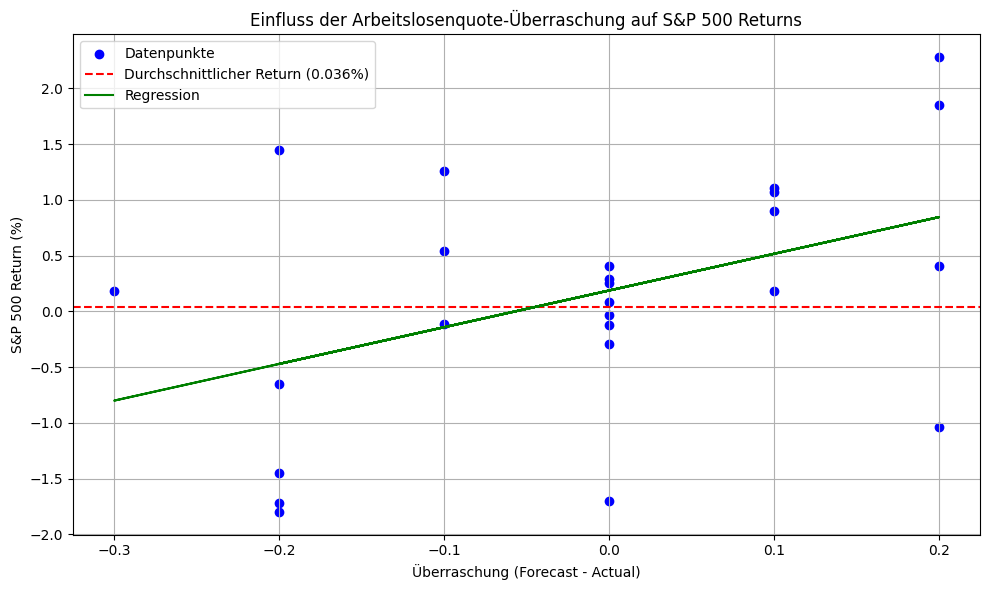

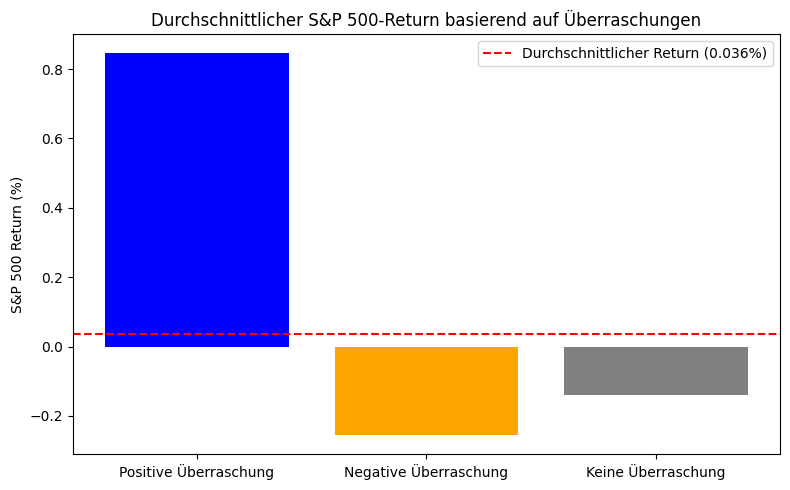

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Daten einfügen
data = {
    'Date': [
        'Oct 04, 2024', 'Aug 02, 2024', 'Jul 05, 2024', 'Jun 07, 2024',
        'May 03, 2024', 'Apr 05, 2024', 'Mar 08, 2024', 'Feb 02, 2024',
        'Jan 05, 2024', 'Dec 08, 2023', 'Sep 01, 2023', 'Jun 02, 2023',
        'May 05, 2023', 'Mar 10, 2023', 'Feb 03, 2023', 'Jan 06, 2023',
        'Sep 02, 2022', 'Dec 02, 2022', 'Jul 07, 2023', 'Sep 06, 2024',
        'Nov 01, 2024', 'Dec 06, 2024', 'Jul 08, 2022', 'Sep 03, 2021',
        'Jan 10, 2020'
    ],
    'Actual': [
        4.10, 4.30, 4.10, 4.00, 3.90, 3.80, 3.90, 3.70,
        3.70, 3.70, 3.80, 3.70, 3.40, 3.60, 3.40, 3.50,
        3.70, 3.70, 3.60, 4.20, 4.10, 4.20, 3.60, 5.20,
        3.50
    ],
    'Forecast': [
        4.20, 4.10, 4.00, 3.90, 3.80, 3.90, 3.70, 3.80,
        3.80, 3.90, 3.50, 3.50, 3.60, 3.40, 3.60, 3.70,
        3.50, 3.70, 3.60, 4.20, 4.10, 4.20, 3.60, 5.20,
        3.50
    ],
    'SP_Return': [
        0.90, -1.80, 0.54, -0.11, 1.26, 1.11, -0.65, 1.07,
        0.18, 0.41, 0.18, 1.45, 1.85, -1.45, -1.04, 2.28,
        -1.72, -0.12, 0.29, -1.70, 0.41, 0.25, 0.08, -0.03,
        -0.29
    ]
}

# DataFrame erstellen
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df['Surprise'] = df['Forecast'] - df['Actual']  # Überraschung berechnen

# Durchschnittlicher täglicher S&P 500-Return
avg_daily_return = 0.036

# Mittelwerte berechnen
positive_surprise_mean = df[df['Surprise'] > 0]['SP_Return'].mean()
negative_surprise_mean = df[df['Surprise'] < 0]['SP_Return'].mean()
no_surprise_mean = df[df['Surprise'] == 0]['SP_Return'].mean()

print(f"Durchschnittlicher S&P 500-Return bei positiver Überraschung: {positive_surprise_mean:.2f}%")
print(f"Durchschnittlicher S&P 500-Return bei negativer Überraschung: {negative_surprise_mean:.2f}%")
print(f"Durchschnittlicher S&P 500-Return bei keiner Überraschung: {no_surprise_mean:.2f}%")
print(f"Durchschnittlicher täglicher S&P 500-Return: {avg_daily_return:.2f}%")

# Regression durchführen
X = df[['Surprise']]
y = df['SP_Return']
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

print(f"Regressionsergebnisse:")
print(f"R²: {r2:.2f}")
print(f"Koeffizient: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}")

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(df['Surprise'], df['SP_Return'], color='blue', label='Datenpunkte')
plt.axhline(avg_daily_return, color='red', linestyle='--', label='Durchschnittlicher Return (0.036%)')
plt.plot(df['Surprise'], model.predict(X), color='green', label='Regression')
plt.xlabel('Überraschung (Forecast - Actual)')
plt.ylabel('S&P 500 Return (%)')
plt.title('Einfluss der Arbeitslosenquote-Überraschung auf S&P 500 Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Balkendiagramm der durchschnittlichen Returns
plt.figure(figsize=(8, 5))
bars = ['Positive Überraschung', 'Negative Überraschung', 'Keine Überraschung']
means = [positive_surprise_mean, negative_surprise_mean, no_surprise_mean]
plt.bar(bars, means, color=['blue', 'orange', 'grey'])
plt.axhline(avg_daily_return, color='red', linestyle='--', label='Durchschnittlicher Return (0.036%)')
plt.title('Durchschnittlicher S&P 500-Return basierend auf Überraschungen')
plt.ylabel('S&P 500 Return (%)')
plt.legend()
plt.tight_layout()
plt.show()
